<a href="https://colab.research.google.com/github/Matvezy/Body-Mesurments/blob/master/U_2_Net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd /content

!/usr/local/cuda/bin/nvcc --version

!git clone https://github.com/shreyas-bk/U-2-Net

%cd /content/U-2-Net
print('making images directory')
!mkdir images
print('making results directory')
!mkdir results

print('importing...')
from google.colab import files
import os
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
from PIL import Image as Img
import cv2
from skimage.transform import resize
print('Done!')

/content
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243
Cloning into 'U-2-Net'...
remote: Enumerating objects: 508, done.
remote: Total 508 (delta 0), reused 0 (delta 0), pack-reused 508
Receiving objects: 100% (508/508), 12.38 MiB | 38.54 MiB/s, done.
Resolving deltas: 100% (231/231), done.
/content/U-2-Net
making images directory
making results directory
importing...
Done!


# Make sure runtype is GPU
**Runtime -> Change Runtime Type -> Hardware Accelerator -> GPU**

In [7]:
%cd /content/U-2-Net/images
uploaded = files.upload()

%cd /content/U-2-Net

/content/U-2-Net/images


Saving Side2.png to Side2.png
/content/U-2-Net


In [8]:
!python -W ignore u2net_test.py

['/content/U-2-Net/images/Front.jpg', '/content/U-2-Net/images/Side.jpg', '/content/U-2-Net/images/Side2.png', '/content/U-2-Net/images/Front2.png', '/content/U-2-Net/images/Side1.png', '/content/U-2-Net/images/Front1.png']
inferencing: Front.jpg
inferencing: Side.jpg
inferencing: Side2.png
inferencing: Front2.png
inferencing: Side1.png
inferencing: Front1.png


In [10]:
image_dir = os.path.join(os.getcwd(), 'images')
names = [name[:-4] for name in os.listdir(image_dir)]
names1 = names[:2]
names2 = names[2:]
names1

['Front', 'Side']

Front


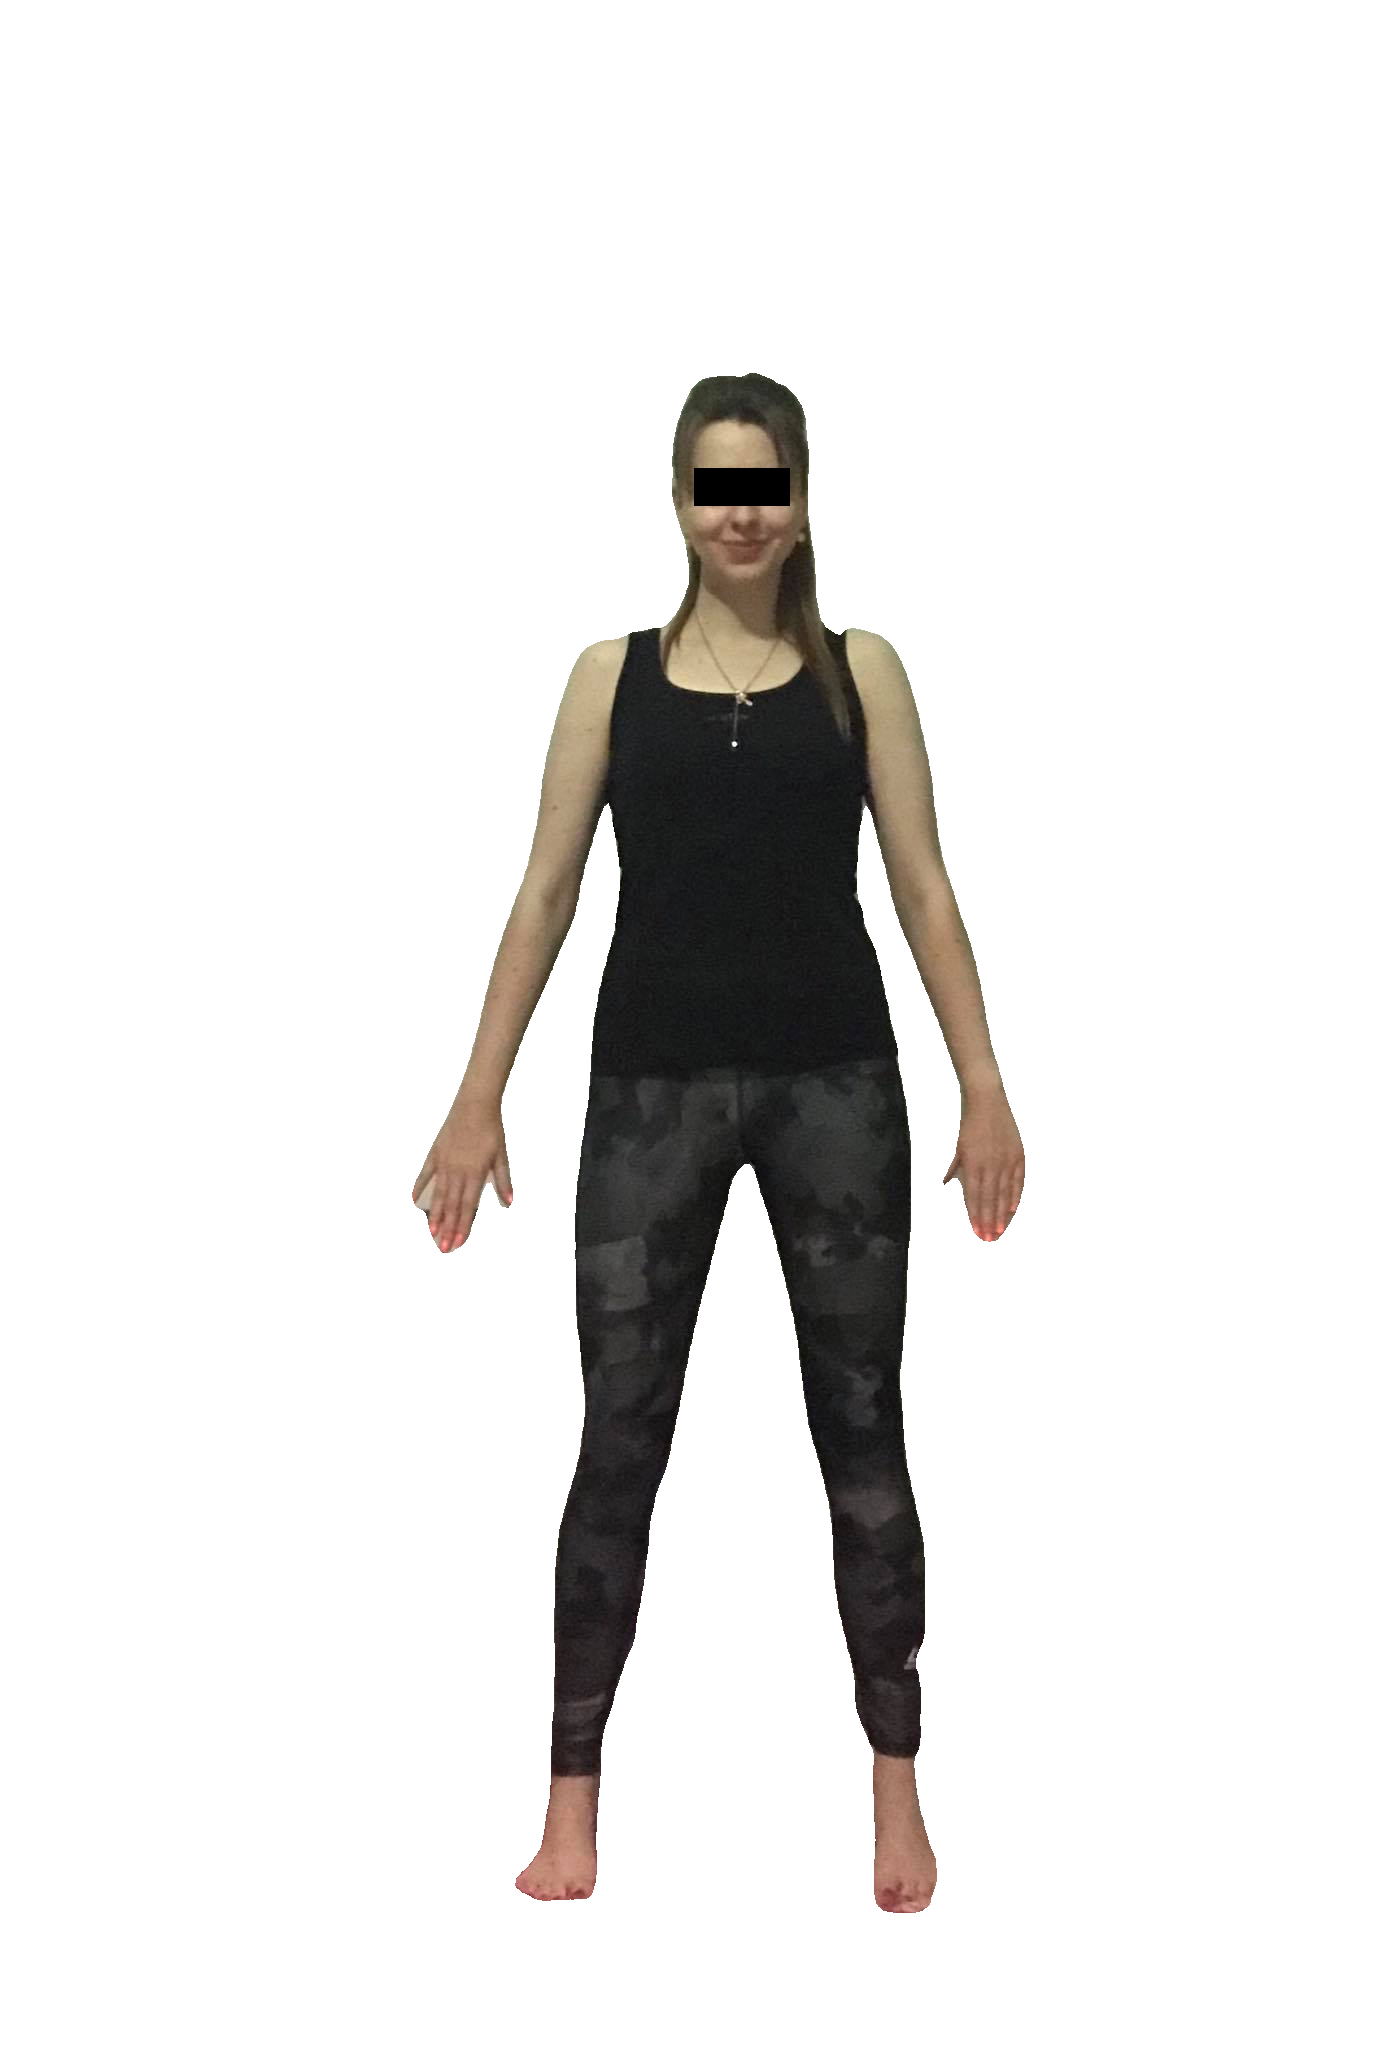

Side


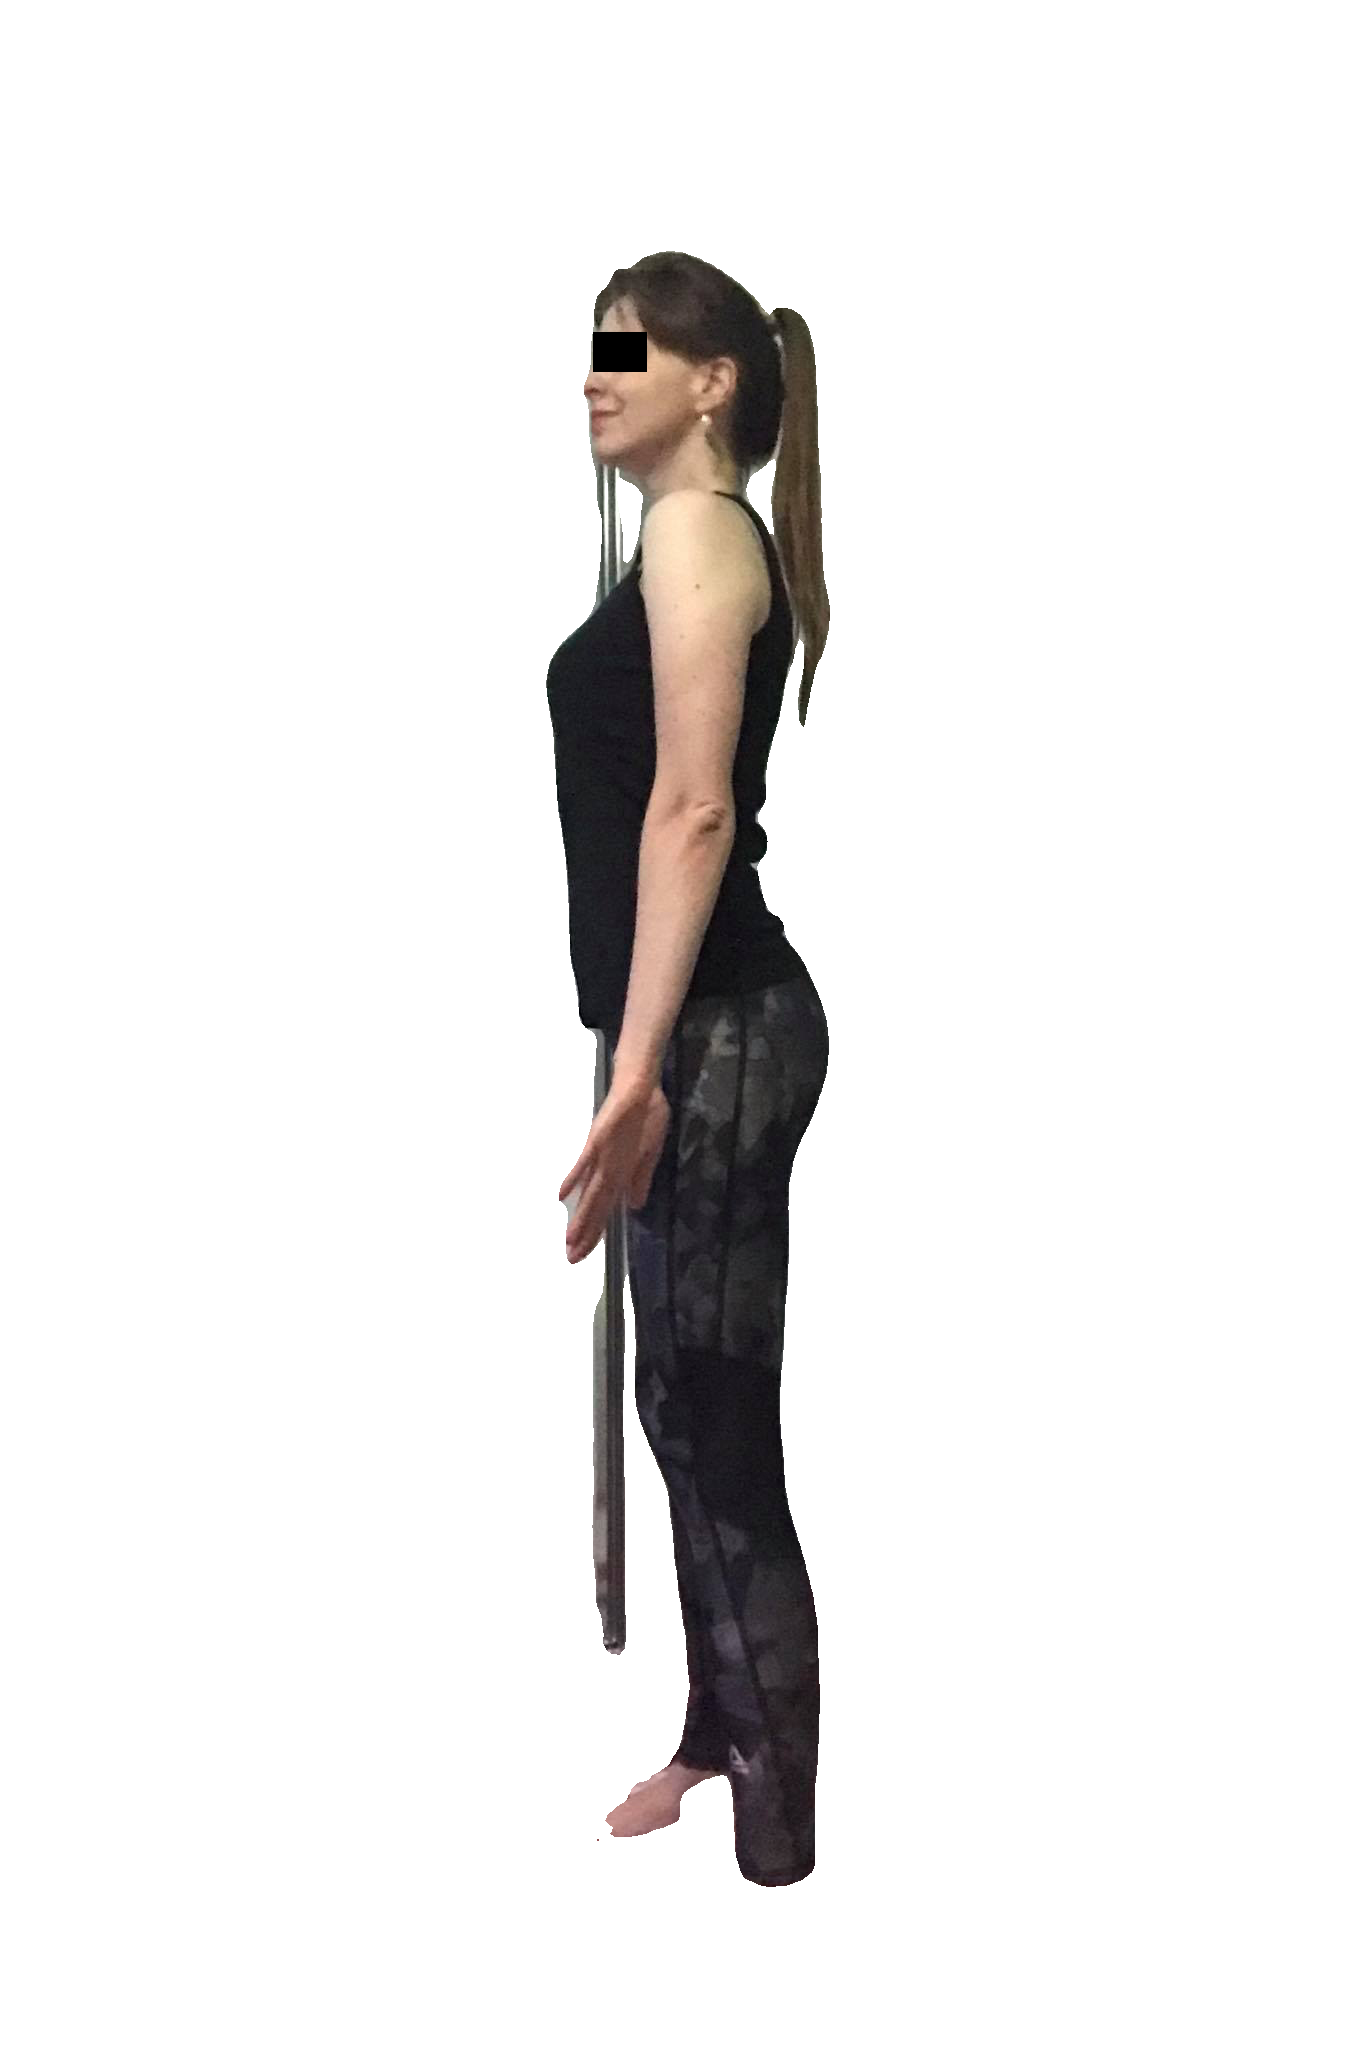

In [11]:
for name in names1:
  print(name)
  output = load_img('/content/U-2-Net/results/'+name+'.png')
  RESCALE = 255
  out_img = img_to_array(output)
  out_img /= RESCALE
  import matplotlib.pyplot as plt
  THRESHOLD = 0.6
  out_img[out_img > THRESHOLD] = 1
  out_img[out_img <= THRESHOLD] = 0
  shape = out_img.shape
  a_layer_init = np.ones(shape = (shape[0],shape[1],1))
  mul_layer = np.expand_dims(out_img[:,:,0],axis=2)
  a_layer = mul_layer*a_layer_init
  rgba_out = np.append(out_img,a_layer,axis=2)
  input = load_img('/content/U-2-Net/images/'+name+'.jpg')
  inp_img = img_to_array(input)
  inp_img /= RESCALE
  a_layer = np.ones(shape = (shape[0],shape[1],1))
  rgba_inp = np.append(inp_img,a_layer,axis=2)
  rem_back = (rgba_inp*rgba_out)
  rem_back_scaled = Img.fromarray((rem_back*RESCALE).astype('uint8'), 'RGBA')
  display(rem_back_scaled)

Side2


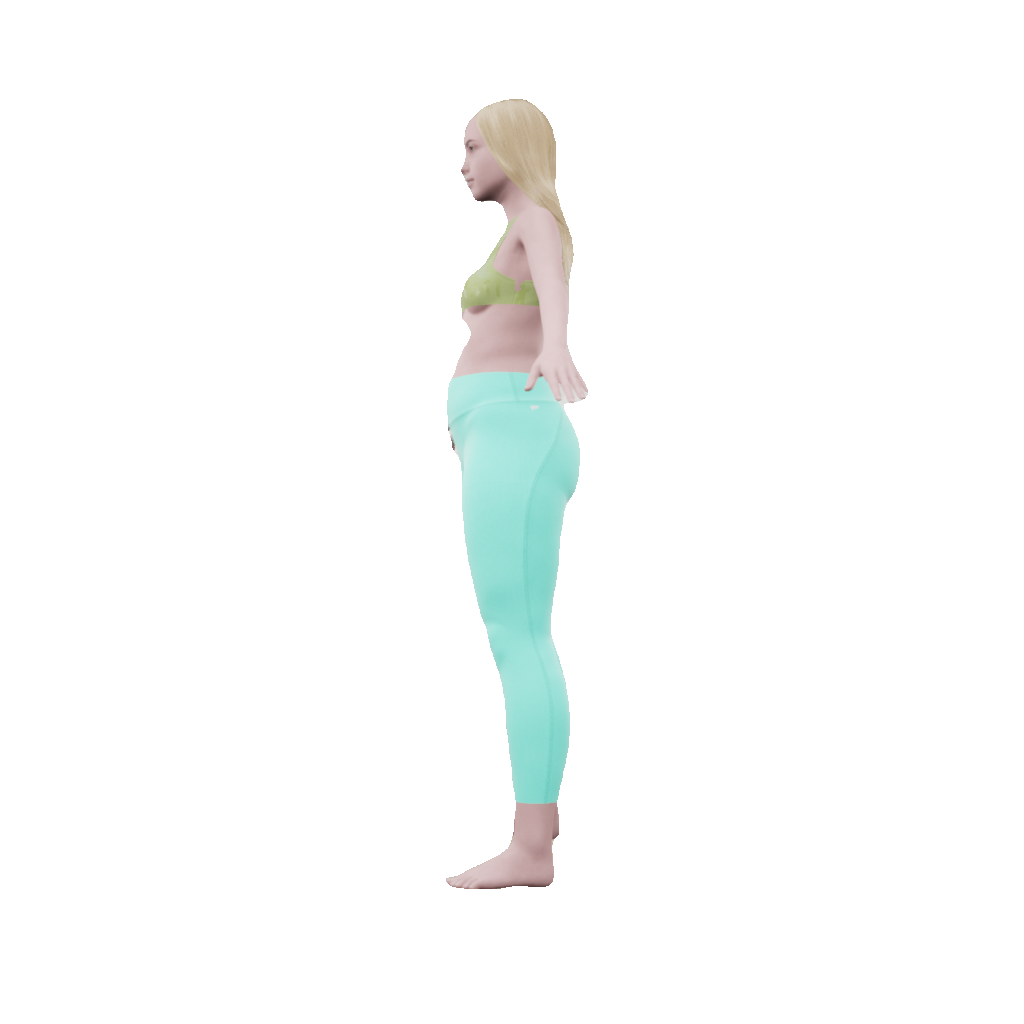

Front2


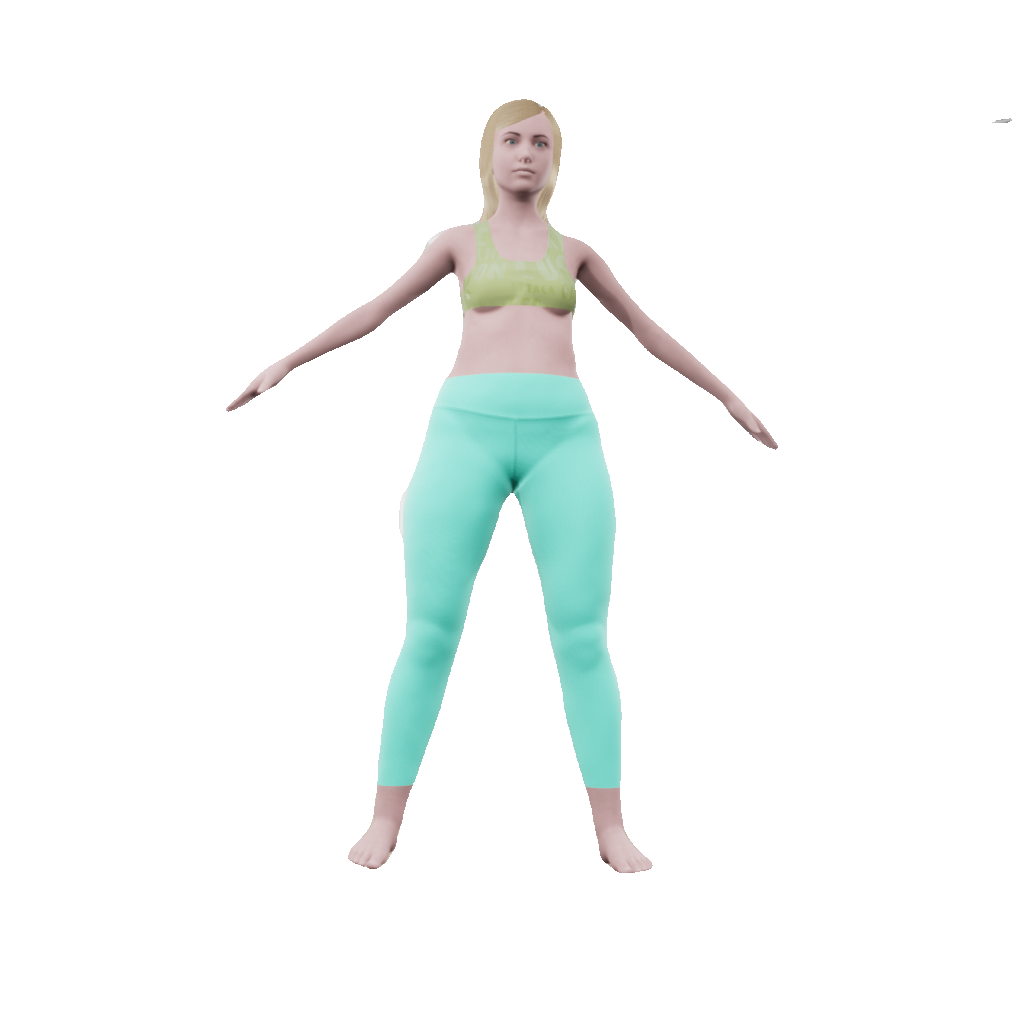

Side1


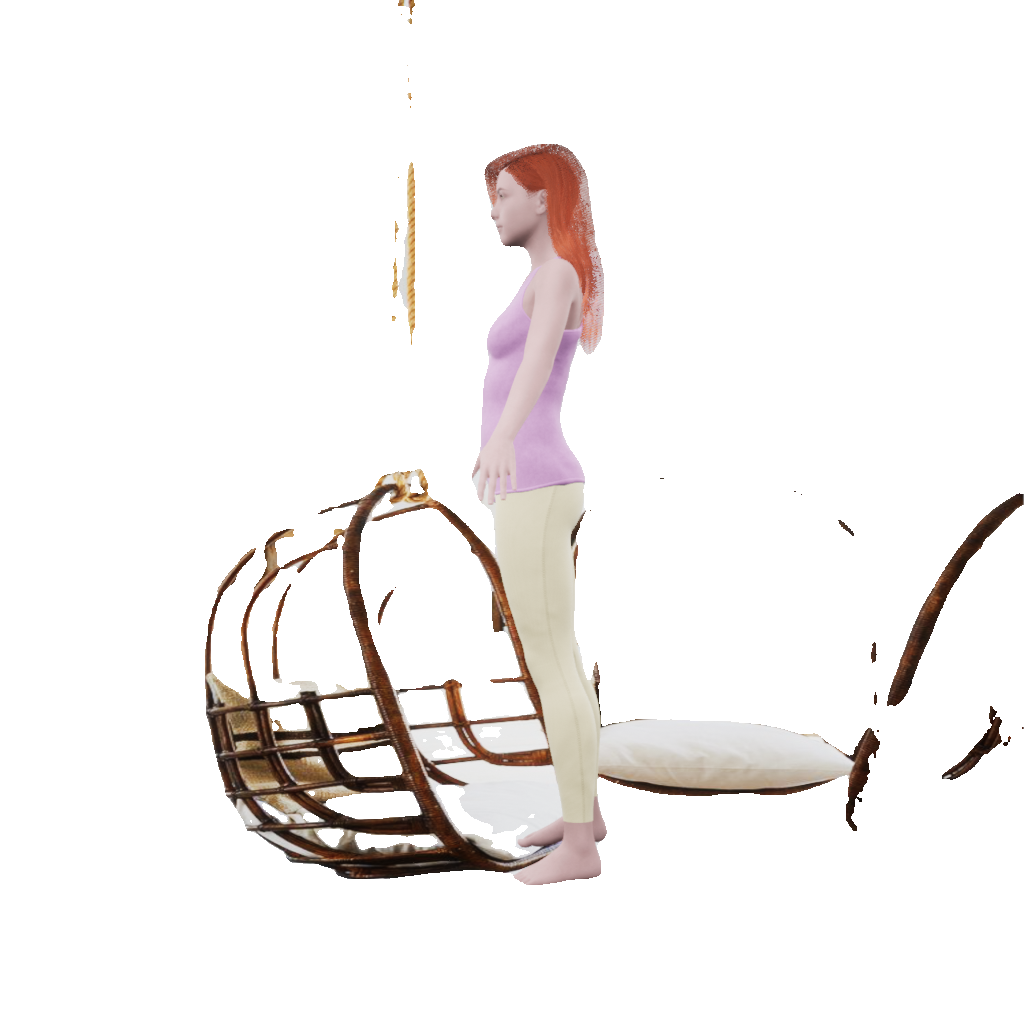

Front1


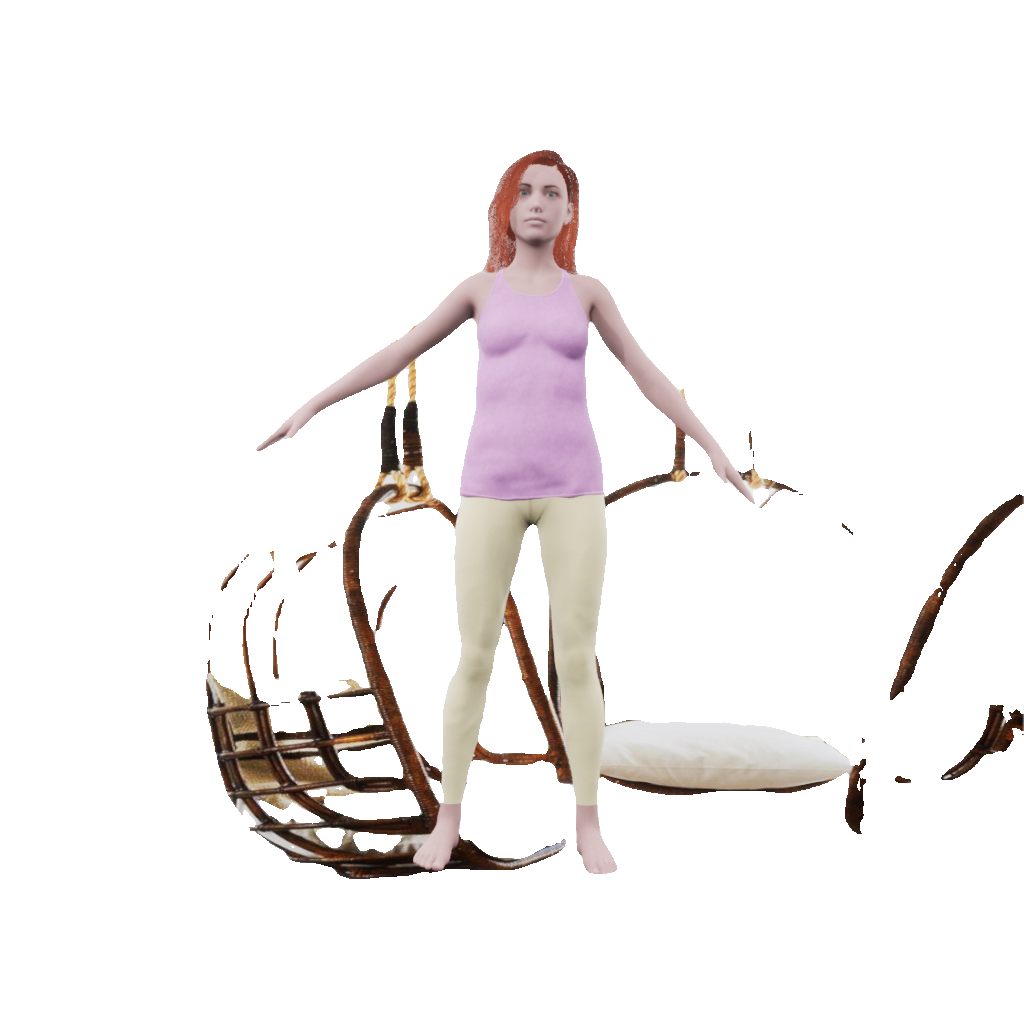

In [12]:
for name in names2:
  print(name)
  output = load_img('/content/U-2-Net/results/'+name+'.png')
  RESCALE = 255
  out_img = img_to_array(output)
  out_img /= RESCALE
  import matplotlib.pyplot as plt
  THRESHOLD = 0.6
  out_img[out_img > THRESHOLD] = 1
  out_img[out_img <= THRESHOLD] = 0
  shape = out_img.shape
  a_layer_init = np.ones(shape = (shape[0],shape[1],1))
  mul_layer = np.expand_dims(out_img[:,:,0],axis=2)
  a_layer = mul_layer*a_layer_init
  rgba_out = np.append(out_img,a_layer,axis=2)
  input = load_img('/content/U-2-Net/images/'+name+'.png')
  inp_img = img_to_array(input)
  inp_img /= RESCALE
  a_layer = np.ones(shape = (shape[0],shape[1],1))
  rgba_inp = np.append(inp_img,a_layer,axis=2)
  rem_back = (rgba_inp*rgba_out)
  rem_back_scaled = Img.fromarray((rem_back*RESCALE).astype('uint8'), 'RGBA')
  display(rem_back_scaled)